In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import statsmodels.tsa.stattools as st
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

In [22]:
df = pd.read_csv('../../dados/Mock_dataset/MockDataset_train.csv')
#df = df['DerivedFlag'].fillna(0)
df['DerivedFlag'] = df['DerivedFlag'].fillna(0)
df['Date'] = df['Date'].str.replace('-', '')
df = df.astype({'DerivedFlag': 'int32'})

df[df['PrimaryKey'] == 'A2']

,GroupKey,PrimaryKey,RelationKey,RelationType,Date,Value,DerivedFlag,DerivedLag,DerivedType
50,A1,A2,A1,RELATED,20200101,25.038282,1,3.0,Roll
51,A1,A2,A1,RELATED,20200102,18.323827,1,3.0,Roll
52,A1,A2,A1,RELATED,20200103,25.586155,1,3.0,Roll
53,A1,A2,A1,RELATED,20200104,20.477068,1,3.0,Roll
54,A1,A2,A1,RELATED,20200105,22.998212,1,3.0,Roll
55,A1,A2,A1,RELATED,20200106,21.374980,1,3.0,Roll
56,A1,A2,A1,RELATED,20200107,20.374229,1,3.0,Roll
57,A1,A2,A1,RELATED,20200108,21.876107,1,3.0,Roll
58,A1,A2,A1,RELATED,20200109,24.194338,1,3.0,Roll
59,A1,A2,A1,RELATED,20200110,16.918903,1,3.0,Roll


In [30]:
dfA1=df[df['PrimaryKey']=='A1'][['Date','Value']]
dfA2=df[df['PrimaryKey']=='A2'][['Date','Value']]

In [32]:
adf_test(dfA2['Value']), adfuller(dfA2['Value'],  autolag='AIC'), kpss(dfA2['Value'], regression='c', nlags="auto")

Results of Dickey-Fuller Test:
Test Statistic                 -3.506576
p-value                         0.007820
#Lags Used                     10.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


(None,
 (-3.5065760148670986,
  0.007819805486256073,
  10,
  39,
  {'1%': -3.610399601308181,
   '5%': -2.939108945868946,
   '10%': -2.6080629651545038},
  249.63047326481134),
 (0.38566834130457534,
  0.08333261150664856,
  4,
  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))

In [14]:
#DIFERENCING
dfA11 = dfA1
dfA11['Value']=dfA1['Value']-dfA1['Value'].shift(1)
dfA11=dfA11.dropna()
dfA11

,Date,Value
1,20200102,-5.0
2,20200103,-2.0
3,20200104,4.0
4,20200105,-8.0
5,20200106,11.0
6,20200107,-9.0
7,20200108,11.0
8,20200109,-8.0
9,20200110,-2.0
10,20200111,5.0


In [18]:
df3=pd.merge(dfA1,dfA2,how='outer',on='Date')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 960000x480000 with 0 Axes>

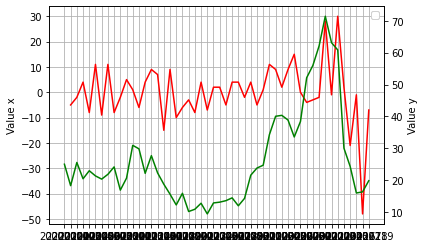

In [19]:
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(1200, 600), dpi=800)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df3['Date'],df3['Value_x'], 'r')
ax2 = ax.twinx()
ax2.plot(df3['Date'],df3['Value_y'], 'g')
ax.set_ylabel("Value x")
ax2.set_ylabel("Value y")
ax.legend(loc=0)
ax2.legend(loc=0)
ax.grid()
plt.show()

In [83]:
df['Date'] = df['Date'].str.replace('-', '')

groups = pd.unique(df['GroupKey'])
res = {}
for group in groups:
    gr = df[df['GroupKey']==group]
    pks = pd.unique(gr['PrimaryKey'])
    root = df[df['PrimaryKey']==group][['Date','Value']]

    r_ = {}
    num_lags = 3
    pks = pks[1:] # remove A1(root) form keys
    for key in pks:
        rel=df[df['PrimaryKey']==key][['Date', 'Value']]
        VAR=pd.merge(root,rel,how='outer',on='Date')

        gc = st.grangercausalitytests(VAR[['Value_x','Value_y']], maxlag=num_lags, verbose=False)

        max_ssrf = 0
        max_ssrchi = 0
        max_lrtest = 0
        max_parmf = 0
        lag_ssrf = 0
        lag_ssrchi = 0
        lag_lrtest = 0
        lag_parmf = 0
        
        for lag, item in gc.items():
            if item[0]['ssr_ftest'][0] > max_ssrf:
                max_ssrf = item[0]['ssr_ftest'][0]
                lag_ssrf = lag
            if item[0]['ssr_chi2test'][0] > max_ssrchi:
                max_ssrchi = item[0]['ssr_chi2test'][0]
                lag_ssrchi = lag
            if item[0]['lrtest'][0] > max_lrtest:
                max_lrtest = item[0]['lrtest'][0]
                lag_lrtest = lag
            if item[0]['params_ftest'][0] > max_parmf:
                max_parmf = item[0]['params_ftest'][0]
                lag_parmf = lag
        r_[key] = {'ssr_ftest': (max_ssrf, lag_ssrf), 'ssr_chi2test': (max_ssrchi, lag_ssrchi), 'lrtest': (max_lrtest, lag_lrtest), 'params_ftest': (max_parmf, lag_parmf)}
    res[group] = r_


In [195]:
groups[0]

[ g for g in groups[:1]]

['A1']

# Stationarity and detrending (ADF/KPSS)

In [219]:
b1=df[df['PrimaryKey']=='A1'][['Date','Value']]
b18=df[df['PrimaryKey']=='A2'][['Date','Value']]
dfm=pd.merge(b1,b18,how='outer',on='Date')

<AxesSubplot:>

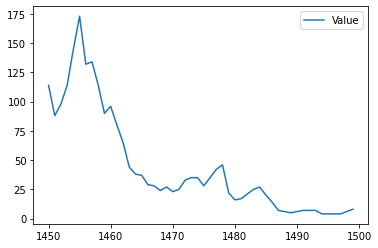

In [27]:
b1.plot()

In [220]:
gc = st.grangercausalitytests(dfm[['Value_x','Value_y']], maxlag=5, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=36.3919 , p=0.0000  , df_denom=46, df_num=1
ssr based chi2 test:   chi2=38.7653 , p=0.0000  , df=1
likelihood ratio test: chi2=28.5595 , p=0.0000  , df=1
parameter F test:         F=36.3919 , p=0.0000  , df_denom=46, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=26.8268 , p=0.0000  , df_denom=43, df_num=2
ssr based chi2 test:   chi2=59.8924 , p=0.0000  , df=2
likelihood ratio test: chi2=38.8768 , p=0.0000  , df=2
parameter F test:         F=26.8268 , p=0.0000  , df_denom=43, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=145.9078, p=0.0000  , df_denom=40, df_num=3
ssr based chi2 test:   chi2=514.3249, p=0.0000  , df=3
likelihood ratio test: chi2=116.5672, p=0.0000  , df=3
parameter F test:         F=145.9078, p=0.0000  , df_denom=40, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=112.1358, p=0.0000  , df_d

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 960000x480000 with 0 Axes>

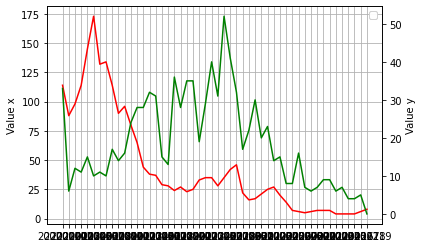

In [50]:
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(1200, 600), dpi=800)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dfm['Date'],dfm['Value_x'], 'r')
ax2 = ax.twinx()
ax2.plot(dfm['Date'],dfm['Value_y'], 'g')
ax.set_ylabel("Value x")
ax2.set_ylabel("Value y")
ax.legend(loc=0)
ax2.legend(loc=0)
ax.grid()
plt.show()

In [55]:
adf_test(b1['Value']), kpss_test(b1['Value']), kpss(b1['Value'], nlags=5)

Results of Dickey-Fuller Test:
Test Statistic                 -2.803718
p-value                         0.057745
#Lags Used                      4.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
Results of KPSS Test:
Test Statistic           0.836387
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


c:\users\1evsa\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(None,
 None,
 (0.7190196314412728,
  0.011816397141702472,
  5,
  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))

In [58]:
adf_test(b18['Value']), kpss_test(b18['Value']), kpss(b18['Value'], nlags=5)

Results of Dickey-Fuller Test:
Test Statistic                 -2.659391
p-value                         0.081333
#Lags Used                      0.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64
Results of KPSS Test:
Test Statistic           0.363253
p-value                  0.092994
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


c:\users\1evsa\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(None,
 None,
 (0.3172042099913177,
  0.1,
  5,
  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))

<AxesSubplot:>

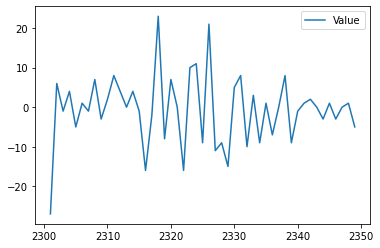

In [52]:
#DIFERENCING B18
dB18 = b18
dB18['Value']= dB18['Value']-dB18['Value'].shift(1)
dB18=dB18.dropna()
dB18.plot()

In [20]:
adf_test(dB18['Value']), kpss_test(dB18['Value']), kpss(dB18['Value'], nlags=5)

NameError: name 'dB18' is not defined

In [69]:
dfm=pd.merge(b1,dB18,how='outer',on='Date').dropna()

In [70]:
gc = st.grangercausalitytests(dfm[['Value_x','Value_y']], maxlag=5, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0343  , p=0.8540  , df_denom=45, df_num=1
ssr based chi2 test:   chi2=0.0366  , p=0.8484  , df=1
likelihood ratio test: chi2=0.0365  , p=0.8484  , df=1
parameter F test:         F=0.0343  , p=0.8540  , df_denom=45, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3167  , p=0.7303  , df_denom=42, df_num=2
ssr based chi2 test:   chi2=0.7088  , p=0.7016  , df=2
likelihood ratio test: chi2=0.7035  , p=0.7035  , df=2
parameter F test:         F=0.3167  , p=0.7303  , df_denom=42, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6861  , p=0.5660  , df_denom=39, df_num=3
ssr based chi2 test:   chi2=2.4278  , p=0.4885  , df=3
likelihood ratio test: chi2=2.3659  , p=0.5000  , df=3
parameter F test:         F=0.6861  , p=0.5660  , df_denom=39, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0634  , p=0.3887  , df_d

In [71]:
gc #test statistic, pvalues, degrees of freedom, the second element are the OLS estimation

{1: ({'ssr_ftest': (0.03427138860605448, 0.8539626030106904, 45.0, 1),
   'ssr_chi2test': (0.0365561478464581, 0.8483715509076911, 1),
   'lrtest': (0.036542234577325416, 0.848400058714849, 1),
   'params_ftest': (0.03427138860608714, 0.8539626030106378, 45.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.3166817850943256, 0.7302869585823546, 42.0, 2),
   'ssr_chi2test': (0.7087639952111097, 0.7016069040015048, 2),
   'lrtest': (0.7034730105821154, 0.7034654569837105, 2),
   'params_ftest': (0.31668178509430933, 0.730286958582365, 42.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6861080521657982, 0.5659603406117482, 39.0, 3),
   'ssr_chi2test': (2.42776695381744, 0.4884867438675752, 3),
   'lrtest': (2.365869705748935, 0.5000195855375218, 3),
   'params_ftest': (0.6861080521658051, 0.5659603406117434, 39.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.

In [6]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)